In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Linear Regression**

In [ ]:
import pandas as pd
import numpy as np
train_df = pd.read_csv('/content/drive/MyDrive/Greeshmanth_machine_learning/Greeshmanth_machinelearning_project_file.csv')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# select the features and target variable
X = train_df[['primary_use', 'square_feet', 'year_built', 'air_temperature', 'dew_temperature', 'wind_speed', 'wind_direction']].copy()
y = train_df['meter_reading']

# encode the primary_use column
le = LabelEncoder()
X['primary_use'] = le.fit_transform(X['primary_use'])
# encode the primary_use column

#X['primary_use'] = le.fit_transform(X['primary_use'])

# print out the category names and their corresponding encoded values
print('Encoded values:', le.classes_)
print('Encoded IDs:', np.unique(X['primary_use']))


# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model on the testing set
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

Encoded values: ['Education' 'Entertainment/public assembly' 'Lodging/residential'
 'Parking' 'Public services' 'Technology/science' 'Utility']
Encoded IDs: [0 1 2 3 4 5 6]
RMSE: 209.55401366437542


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# select the features and target variable
X = train_df[['primary_use', 'square_feet', 'year_built', 'air_temperature', 'dew_temperature', 'wind_speed', 'wind_direction']]
y = train_df['meter_reading']

# encode the primary_use column
le = LabelEncoder()
X['primary_use'] = le.fit_transform(X['primary_use'])
print('Encoded values:', le.classes_)
print('Encoded IDs:', np.unique(X['primary_use']))

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# evaluate the model on the testing set
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

<ipython-input-4-6a00c09bd3dd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['primary_use'] = le.fit_transform(X['primary_use'])


Encoded values: ['Education' 'Entertainment/public assembly' 'Lodging/residential'
 'Parking' 'Public services' 'Technology/science' 'Utility']
Encoded IDs: [0 1 2 3 4 5 6]
RMSE: 44.03559718610939


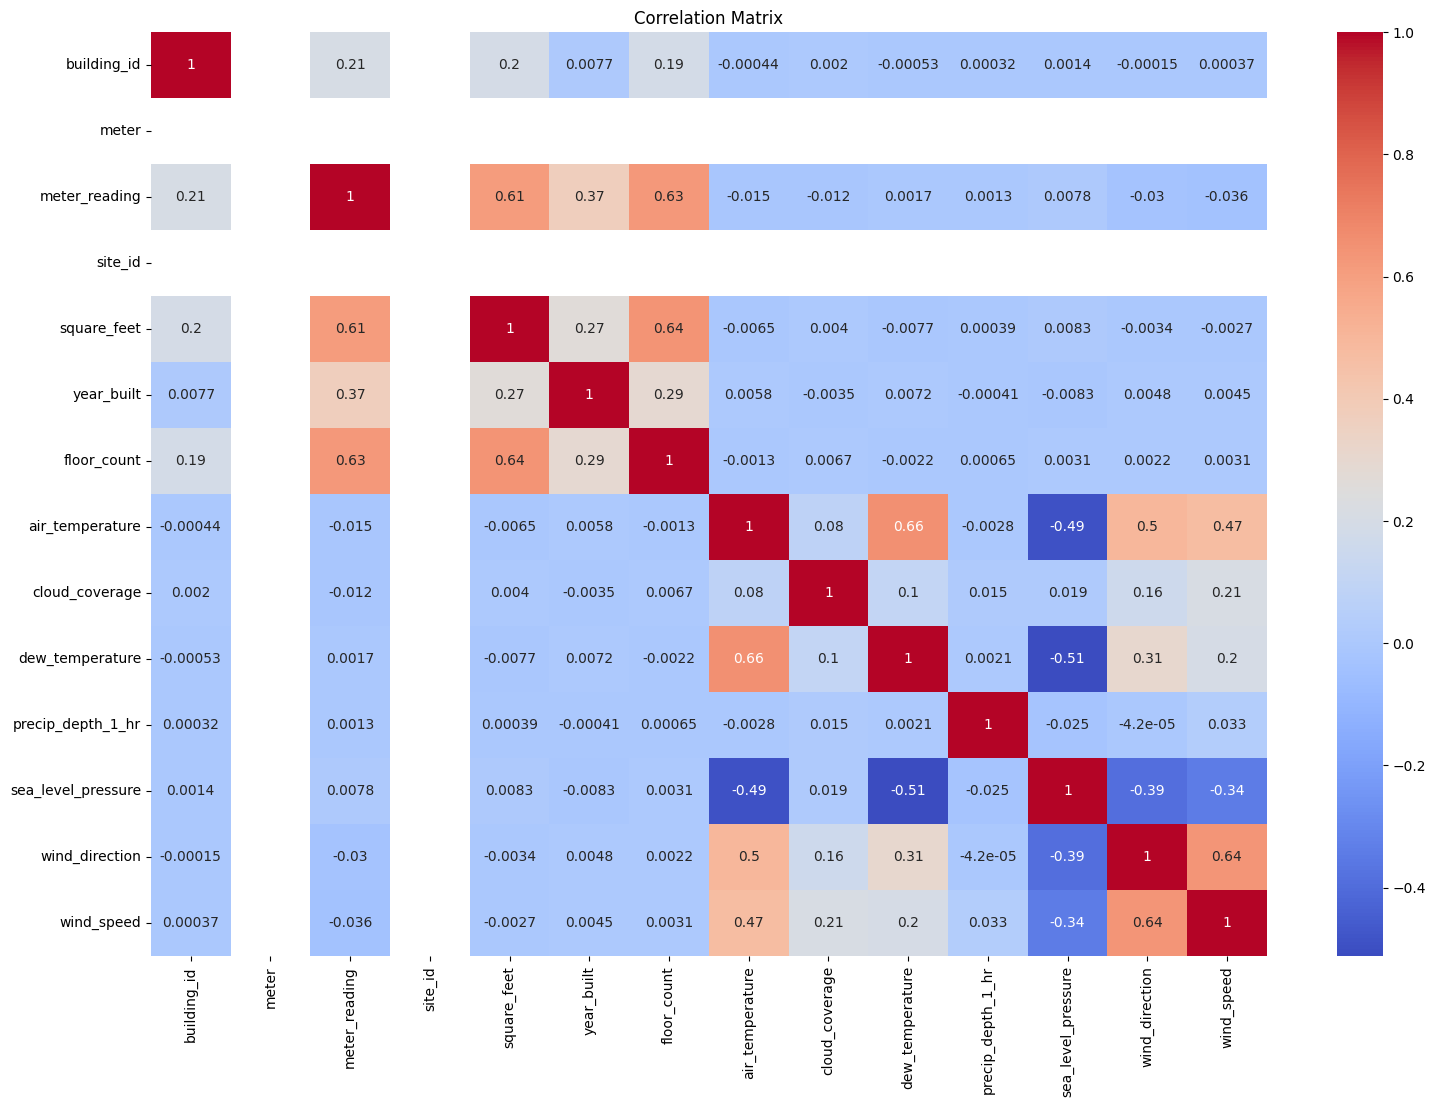

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/Greeshmanth_machine_learning/Greeshmanth_machinelearning_project_file.csv') # assuming a train.csv file exists in the current directory

corr_matrix = train_df.corr()

plt.figure(figsize=(18,12)) # increase the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

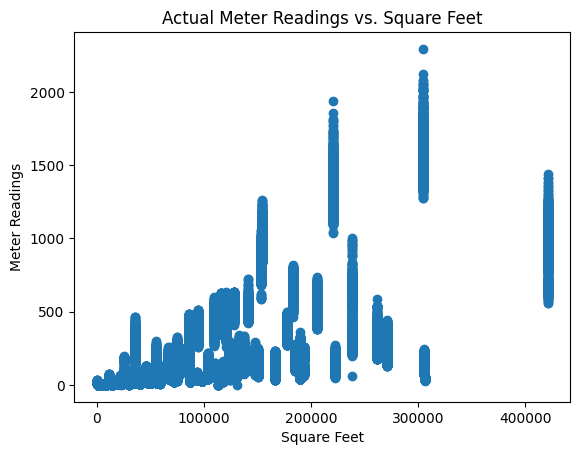

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test['square_feet'], y_test)
plt.xlabel('Square Feet')
plt.ylabel('Meter Readings')
plt.title('Actual Meter Readings vs. Square Feet')
plt.show()

In [ ]:
import joblib

# save the trained model
joblib.dump(model, 'random_forest_regression_model_Final.pkl')

['random_forest_regression_model_Final.pkl']

**Prediction Making**

In [ ]:
import pandas as pd
import numpy as np
import joblib

# define statistical averages
people_per_sqft = 0.01
ac_per_sqft = 0.0008
fan_per_sqft = 0.0004
ac_temp_diff = 20
fan_speed = 3

# define function to calculate suggested AC temperature based on air and dew temperature
def suggested_ac_temp(air_temp, dew_temp):
    return air_temp - ac_temp_diff + (dew_temp / 10)

# take inputs from user
usage = int(input("Enter primary use (Education/Entertainment/public assembly/Lodging/residential/Parking/Public services/Technology/science/Utility): "))
total_size = int(input("Enter total square footage of the room: "))
temperature = int(input("Enter current air temperature: "))
num_people = int(input("Enter the number of people the room needs to accommodate: "))
ac_location = input("Enter the location of AC unit(s) (ceiling/wall): ")
light_location = input("Enter the location of light fixtures (ceiling/wall): ")
year_built=int(input("Enter Year of Build"))
dew_temp1=float(input("Enter the dew Temperature"))
windspeed=float(input("Enter WindSpeed"))
WindDirection=float(input("Enter WindDirection"))
# calculate suggested number of people, ACs, and fans based on room size and temperature
num_people = int(total_size * people_per_sqft)
num_acs = int(total_size * ac_per_sqft)
num_fans = int(total_size * fan_per_sqft)
suggested_ac = suggested_ac_temp(temperature, 10)
suggested_fan_speed = fan_speed

# print suggestions
print("This room can accommodate up to", num_people, "people.")
print("We recommend setting the AC temperature to", suggested_ac, "degrees Celsius.")
print("We recommend using", num_acs, "AC units and", num_fans, "fans.")
print("The recommended fan speed is", suggested_fan_speed, ".")

# load the model
model = joblib.load('/content/random_forest_regression_model_Final.pkl')

# create a new data point for testing the model
new_data = pd.DataFrame({'primary_use': [usage], 'square_feet': [total_size], 'year_built': [year_built], 'air_temperature': [temperature], 'dew_temperature': [dew_temp1], 'wind_speed': [windspeed], 'wind_direction': [WindDirection]})

# make a prediction on the new data point
y_pred = model.predict(new_data)
print('Predicted meter reading:', y_pred)

Enter primary use (Education/Entertainment/public assembly/Lodging/residential/Parking/Public services/Technology/science/Utility): 2
Enter total square footage of the room: 20000
Enter current air temperature: 56
Enter the number of people the room needs to accommodate: 4
Enter the location of AC unit(s) (ceiling/wall): 2
Enter the location of light fixtures (ceiling/wall): 2
Enter Year of Build2020
Enter the dew Temperature-2.65
Enter WindSpeed4.7
Enter WindDirection180
This room can accommodate up to 200 people.
We recommend setting the AC temperature to 37.0 degrees Celsius.
We recommend using 16 AC units and 8 fans.
The recommended fan speed is 3 .
Predicted meter reading: [27.296333]


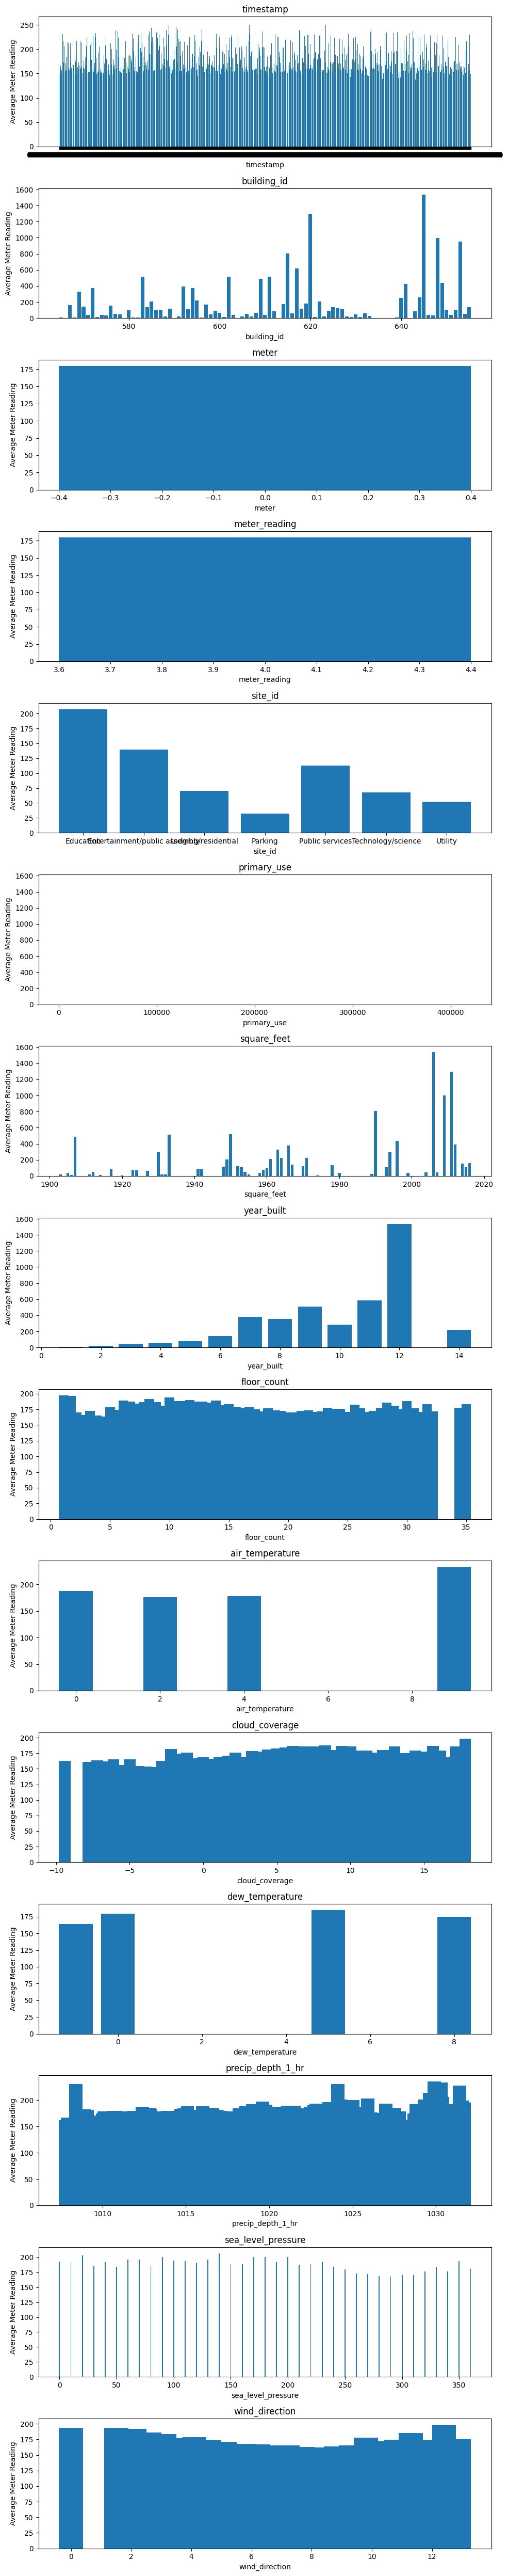

In [ ]:
import matplotlib.pyplot as plt

# calculate average meter readings for each column
avg_meter_readings = []
for col in train_df.columns:
    if col != 'meter_reading':
        avg_meter_readings.append(train_df.groupby(col)['meter_reading'].mean())

# plot the average meter readings for each column
fig, axes = plt.subplots(nrows=len(train_df.columns)-1, figsize=(10, 50))
for i, ax in enumerate(axes):
    ax.bar(avg_meter_readings[i].index, avg_meter_readings[i].values)
    ax.set_title(train_df.columns[i])
    ax.set_xlabel(train_df.columns[i])
    ax.set_ylabel('Average Meter Reading')
plt.tight_layout()
plt.show()

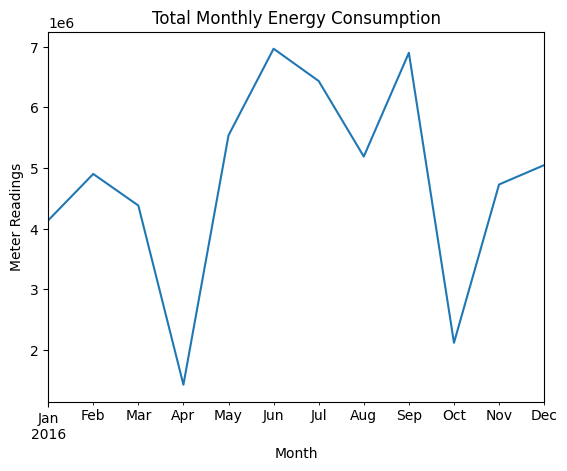

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
train_df.set_index('timestamp', inplace=True)

train_df['meter_reading'].resample('M').sum().plot()
plt.xlabel('Month')
plt.ylabel('Meter Readings')
plt.title('Total Monthly Energy Consumption')
plt.show()